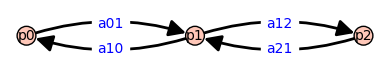

In [1]:
var('p0 p1 p2 a01 a10 a12 a21')
G=graphs.PathGraph(3).to_directed()
G.relabel({0:p0,1:p1,2:p2})
G.set_edge_label(p0,p1,a01)
G.set_edge_label(p1,p0,a10)
G.set_edge_label(p1,p2,a12)
G.set_edge_label(p2,p1,a21)
G.show(figsize=4,edge_labels=True)

In [2]:
A = G.weighted_adjacency_matrix()

In [3]:
L = diagonal_matrix(sum(A.T))-A
show(L)

[      a01      -a01         0]
[     -a10 a10 + a12      -a12]
[        0      -a21       a21]

In [4]:
sum(A.T) == sum(A.columns())

True

In [5]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

In [6]:
Q = generator(A)
show(Q)

[      -a01        a01          0]
[       a10 -a10 - a12        a12]
[         0        a21       -a21]

In [7]:
sum(Q.columns()) == sum(Q.T)

True

In [8]:
z0 = Q[[1,2],[1,2]].determinant().simplify_full()
z1 = Q[[0,2],[0,2]].determinant().simplify_full()
z2 = Q[[0,1],[0,1]].determinant().simplify_full()
print(f'[ z0 : z1 : z2 ] = [ {z0} : {z1} : {z2} ]')

[ z0 : z1 : z2 ] = [ a10*a21 : a01*a21 : a01*a12 ]


In [9]:
zT = z0+z1+z2
p0 = z0/zT
p1 = z1/zT
p2 = z2/zT
show(table([[f'{p0=}'],[f'{p1=}'],[f'{p2=}']]))

p0=a10*a21/(a01*a12 + a01*a21 + a10*a21)
p1=a01*a21/(a01*a12 + a01*a21 + a10*a21)
p2=a01*a12/(a01*a12 + a01*a21 + a10*a21)


In [10]:
def hill_diagramatic_method(Q):
    n = Q.nrows()
    if Q.ncols() != n:
        raise ValueError
    z = [0]*n
    for i in range(n):
        a = [ j for j in range(n) ]
        a.remove(i)
        z[i] = Q[a,a].determinant().simplify_full()
    return z

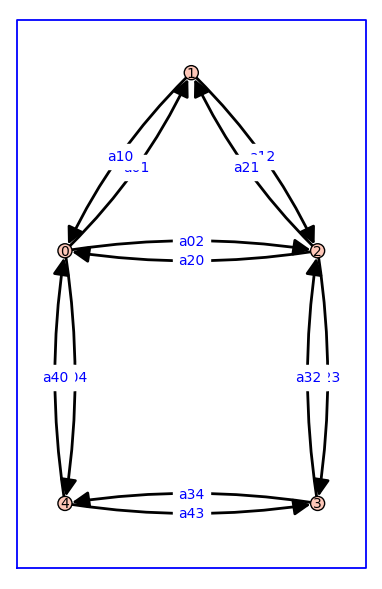

In [11]:
var('p0 p1 p2 p3 p4 a01 a10 a02 a20 a04 a40 a12 a21 a23 a32 a34 a43')
d = {0: {1:a01, 2:a02, 4:a04}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20, 3:a23}, 3: {2:a32, 4:a34}, 4: {3:a43, 0:a40}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (2,-2), 4: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [12]:
A = G.weighted_adjacency_matrix()
Q = generator(A)
show(Q)

[-a01 - a02 - a04              a01              a02                0              a04]
[             a10       -a10 - a12              a12                0                0]
[             a20              a21 -a20 - a21 - a23              a23                0]
[               0                0              a32       -a32 - a34              a34]
[             a40                0                0              a43       -a40 - a43]

In [13]:
z = hill_diagramatic_method(Q)
for i in range(5):
    print('z[%s] ='%i, f'{z[i]}')

z[0] = ((a10 + a12)*a20 + a10*a21)*a32*a43 + (((a10 + a12)*a20 + a10*a21)*a32 + ((a10 + a12)*a20 + a10*a21 + (a10 + a12)*a23)*a34)*a40
z[1] = (a01*a20 + (a01 + a02 + a04)*a21)*a32*a43 + ((a01*a20 + (a01 + a02)*a21)*a32 + (a01*a20 + (a01 + a02)*a21 + a01*a23)*a34)*a40
z[2] = ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a32*a43 + ((a02*a10 + (a01 + a02)*a12)*a32 + (a02*a10 + (a01 + a02)*a12)*a34)*a40
z[3] = (a02*a10 + (a01 + a02)*a12)*a23*a40 + (a04*a10*a21 + (a04*a10 + a04*a12)*a20 + ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a23)*a43
z[4] = (a04*a10*a21 + (a04*a10 + a04*a12)*a20)*a32 + (a04*a10*a21 + (a04*a10 + a04*a12)*a20 + ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a23)*a34
